## Pneumonia Detection
The dataset used can be found in the link https://www.kaggle.com/c/rsna-pneumonia-detection-challenge

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
#Set your file path 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

!pip install pydicom
import pydicom

file_path =  '/content/drive/My Drive/Capstone Project/'

os.chdir(file_path)

     |████████████████████████████████| 35.5MB 1.3MB/s 


In [ ]:
#unzip the test zip file

from zipfile import ZipFile

with ZipFile('rsna-pneumonia-detection-challenge.zip', 'r') as z:
  z.extractall()

In [ ]:
# Check for file format in the train images folder

for file in os.listdir((os.path.join(file_path,'stage_2_train_images'))):
  if not file.endswith('.dcm'):
    print(file)

In [ ]:
# Check for file format in the test images folder

for file in os.listdir((os.path.join(file_path,'stage_2_test_images/'))):
  if not file.endswith('.dcm'):
    print(file)

All the files in the training and testing folders are in the .dcm format.

## Problem Statement
Chest Radiograph is the most commonly performed diagnostic imaging study. Due to the high volume of chest radiography, it could be very time consuming and intensive for the radiologists to review each image manually. As such, an automated solution is ideal to locate the position of inflammation in an image. By having such an automated pneumonia screening system, this can assist physicians to make better clinical decisions.

## Introduction
The aim is to build a pneumonia detection system to automate pneumonia screening in chest radiographs by detecting if the radiograph image has pneumonia and if it has, to have a bounding box to detect the area of pneumonia.
<br>
<br>This study/project will help to automate pneumonia screening in chest radiographs, by being able to act as a first layer check to improve efficiency in diagnosis if the lung was deemed to have pneumonia with the area detected in the picture, and to assist physicians to make better clinical decisions, such as for the images labelled "Not Normal No Lung Opacity",to reduce false positives by the algorithmn, and potentially detecting other potential health issues which are not pneumonia.

In [ ]:
# Check for number of training images available

len(os.listdir((os.path.join(file_path,'stage_2_train_images'))))

26684

In [ ]:
# Check for number of test images available

len(os.listdir((os.path.join(file_path,'stage_2_test_images'))))

3000

In [ ]:
# Load stage_2_detailed_class_info.csv file

df_class = pd.read_csv('stage_2_detailed_class_info.csv')

df_class.head()

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


In [ ]:
# Checking info of stage_2_detailed_class_info pandas table

df_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patientId  30227 non-null  object
 1   class      30227 non-null  object
dtypes: object(2)
memory usage: 472.4+ KB


In [ ]:
# Check for missing values in the class label file

df_class.isnull().sum()

patientId    0
class        0
dtype: int64

In [ ]:
# Check for duplicate patientID in class label file

df_class.duplicated().sum()

3543

In [ ]:
# Check for types of class labels 

df_class["class"].value_counts()

No Lung Opacity / Not Normal    11821
Lung Opacity                     9555
Normal                           8851
Name: class, dtype: int64

In [ ]:
# Check for % of them in the dataset

df_class["class"].value_counts() / len(df_class)

No Lung Opacity / Not Normal    0.391074
Lung Opacity                    0.316108
Normal                          0.292818
Name: class, dtype: float64

In [ ]:
# Load stage_2_train_labels.csv file

df_label = pd.read_csv('stage_2_train_labels.csv')

df_label.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [ ]:
# Checking info of stage_2_train_labels pandas table

df_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.4+ MB


In [ ]:
# Check for missing values in the train label file

df_label.isnull().sum()

patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
dtype: int64

In [ ]:
# Check for duplicate patientID in train label file

df_label.duplicated().sum()

0

In [ ]:
# Check for mismatches betwen the 2 csv files

list_class_Id = list(df_class['patientId'])
list_label_Id = list(df_label['patientId'])

if list_class_Id == list_label_Id: 
    print ("The patientIds in both files are identical") 
else : 
    print ("The patientIds in both files  are not identical") 

The patientIds in both files are identical


In [ ]:
# Check for mismatches between the csv files and the DICOM training image files

list_DICOM_Id = []
for i in os.listdir((os.path.join(file_path,'stage_2_train_images'))):
  list_DICOM_Id.append(i.split('.')[0])

if set(list_class_Id) == set(list_DICOM_Id): 
    print ("The patientIds in both files are identical. There are duplicate patientIds in the csv files.") 
else : 
    print ("The patientIds in both files  are not identical. There is a mismatch in patientIds between the DICOM files and the csv files.") 

The patientIds in both files are identical. There are duplicate patientIds in the csv files.


In [ ]:
# Confirm difference in count

len(list_class_Id) - len(list_DICOM_Id)

3543

##Data Report
Images from the "stage_2_train_images" folder are taken via CXR, which is a chest x-ray. It produces images of the heart, lungs, airways, blood vessels and the bones of the spine and chest. Each image corresponds to the x-ray of a unique patientId. It is accompanied by 2 sets of files, "stage_2_detailed_class_info" and "stage_2_train_labels".
<br>There are 26,684 DICOM image files. From the above, there appears to have more records in "stage_2_detailed_class_info" and "stage_2_train_labels" files with a number of 30,227 records, a difference of 3,543. This might be due to additional records to detect different pneumonia areas within the same x ray image. We can confirm this later when we take a deeper look at the DICOM images.
<br>
<br>"stage_2_detailed_class_info"
<br>"stage_2_detailed_class_info" file contains the class labelling of the patientIds' xray image into 3 classes, "No Lung Opacity / Not Normal", "Normal" and "Lung Opacity". There is no missing data from this file. There is a slight imbalance in the proportion of available data for "No Lung Opacity / Not Normal" at 39%, and 31% and 29% for "Normal" and "Lung Opacity" respectively.
<br>
<br>"stage_2_train_labels"
<br>"stage_2_train_labels" contains the bounding boxes of detected pneumonia in the corresponding patientIds' xray images with the x and y co-ordinates and the height and weight of the box, and a target column which is either a 1 for pneumonia detected, and hence will have a bounding box, or 0 for no pneumonia detected. When pneumonia is detected, it will correspond to the label of "Lung Opacity" in the "stage_2_detailed_class_info" file. There are 9,555 records of patientIDs with bounding boxes, and this corresponds to the number of labels of "Lung Opacity" in the "stage_2_detailed_class_info" file.



In [ ]:
# Load the DICOM files

!pip install pydicom
import pydicom
import matplotlib.pyplot as plt

     |████████████████████████████████| 35.5MB 103kB/s 


label: No Lung Opacity / Not Normal
0004cfab-14fd-4e49-80ba-63a80b6bddd6


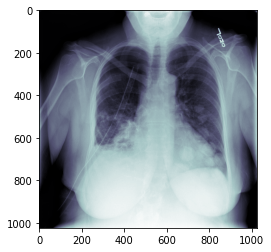

In [ ]:
# DICOM image with class label "No Lung Opacity / Not Normal"

print('label: No Lung Opacity / Not Normal')
print(df_class['patientId'][0])
filename = df_class['patientId'][0] + '.dcm'
filename = (os.path.join(file_path,'stage_2_train_images',filename))

dataset = pydicom.dcmread(filename)

plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)
plt.show()


label: Normal
003d8fa0-6bf1-40ed-b54c-ac657f8495c5


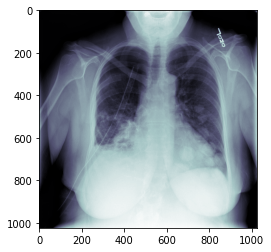

In [ ]:
# DICOM image with class label "Normal"

print('label: Normal')
print(df_class['patientId'][3])
filename = df_class['patientId'][0] + '.dcm'
filename = (os.path.join(file_path,'stage_2_train_images',filename))

dataset = pydicom.dcmread(filename)

plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)
plt.show()


label: Lung Opacity
00436515-870c-4b36-a041-de91049b9ab4


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


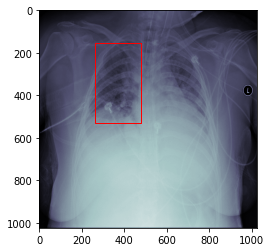

In [ ]:
# DICOM image with class label "Lung Opacity"

from matplotlib.patches import Rectangle

print('label: Lung Opacity')
print(df_class['patientId'][4])
filename = df_class['patientId'][4] + '.dcm'
filename = (os.path.join(file_path,'stage_2_train_images',filename))

dataset = pydicom.dcmread(filename)

plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)

bb = Rectangle((df_label['x'][4], df_label['y'][4]), df_label['width'][4], df_label['height'][4], fill=False, color='red')
plt.axes().add_patch(bb)
plt.show()


label: Lung Opacity
00436515-870c-4b36-a041-de91049b9ab4


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


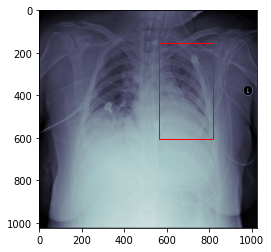

In [ ]:
# DICOM image with class label "Lung Opacity"

from matplotlib.patches import Rectangle

print('label: Lung Opacity')
print(df_class['patientId'][5])
filename = df_class['patientId'][5] + '.dcm'
filename = (os.path.join(file_path,'stage_2_train_images',filename))

dataset = pydicom.dcmread(filename)

plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)

bb = Rectangle((df_label['x'][5], df_label['y'][5]), df_label['width'][5], df_label['height'][5], fill=False, color='red')
plt.axes().add_patch(bb)
plt.show()

label: Lung Opacity
0100515c-5204-4f31-98e0-f35e4b00004a


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


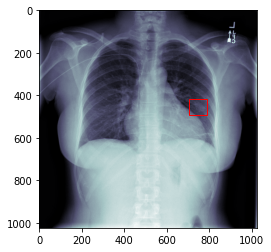

In [ ]:
# DICOM image with class label "Lung Opacity"

from matplotlib.patches import Rectangle

print('label: Lung Opacity')
print(df_class['patientId'][22])
filename = df_class['patientId'][22] + '.dcm'
filename = (os.path.join(file_path,'stage_2_train_images',filename))

dataset = pydicom.dcmread(filename)

plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)

bb = Rectangle((df_label['x'][22], df_label['y'][22]), df_label['width'][22], df_label['height'][22], fill=False, color='red')
plt.axes().add_patch(bb)
plt.show()


##Initial Exploratory data Analysis
From the above, I have loaded a few DICOM image files for visualization. I have loaded at least one image from each of the 3 classes, "No Lung Opacity / Not Normal", "Normal" and "Lung Opacity". For images labelled with "Lung Opacity", I have loaded the bounding box which detected the lung opacity / inflammation area for pneumonia in red as well.
<br>
<br>The first image I have loaded is one labelled with "No Lung Opacity / Not Normal". From this image, it is loaded as monochromatic, where white usually reveals the bones, skin and organs of the person. We can see the spinal cord and the ribcage clearly. Where there are black patches, they are empty space. For this set of lungs, there are some faint white patches in the lung area, when it is expected to be empty, ie black. This might be the case why the image is labelled with "No Lung Opacity / Not Normal".
<br>
<br>For the second loaded image, it is labelled with "Normal". Here we can see that the area of lungs is clearer (ie greater area of black patches) compared to the first image. Although visually, it appears to be only slightly clearer compared to the first image.
<br>
<br>For the third and fourth loaded images, they are labelled with "Lung Opacity". They are actually duplicate patientIDs and I loaded both of them to see if there are any differences. The third image has the bounding box locating the opacity on the right side lung, while the fourth image has the bounding box locating the opacity on the left side lung, both pointing to the same patientID. This makes sense as pneumonia may develop on either side of the lungs or both lungs as well. This might be why as to there being duplicate patientIDs in the csv files as they may point to 2 separate records of both lung sides detecting the opacity. It would make sense to retain the 2 records, so that the algorithmn created will be able to detect lung opacity in both sides of the lungs, rather than being skewed or bias to only be able to detect 1 side of the lungs. As such, I will not be removing the duplicate patientId records from the file.
<br>
<br>For the 5th and final image loaded, it is labelled with "Lung Opacity". I loaded this to check as the bounding box region provided is quite small, and I would like to see if there are any issues with this. To be honest, as I am not an expert in this domain, visually inspecting it does not really tell me much that this indeed has lung opacity. However, it does make sense that pneumonia may not necessarily be apparent, and this might be a case of early detection, since the bounding box area is relatively small compared to the previous 2 images.
<br>
<br>The above analysis of the images highlight the difficulty in visual inspection of the DICOM images and further strengthens the need for an algorithmn to be able to assist the medical practioners in making better informed decisions. Despite the duplicate records and uncertain lung opacity detection, I would still retain all the data for training my model.

# Model Building:

Here, I will be building the model using U-Net mobilenet architecture and also exploring the possibility of perfoming the following steps to fine-tune the model and improve performance:
1. Training all the layers of the model
2. Input all the available training data split into several loading batches
3. Modifying the learning rate on the Optimizer Adam
4. Switching the Optimizer to using SGD with varying parameters
5. Modify the loss function? (ie to IOU instead of mse?)
6. Modify the monitoring losses in the EarlyStopping component
7. Train the weights from the very beginning? (ie training from scratch)
8. Data Augmentation?

I will also be looking to combine some of them in iterations to see if model performance can be improved.

### Step 1 Creation of numpy masks arrays as input to datagenerator function
A main problem I faced constantly was how to train the model on all the training data provided, as google colab constantly crashes due to memory issues as previously I was attempting to load all the files to memory, which due to a lack of memory space, google colab will crash. I picked up on several functions from Keras library which were able to load the files from directory, saving the memory space allowed on google colab. I read up and researched more on it and decided upon creating a custom data generator function which was used to fit the model with data. I had to store the bounding box masks in a loadable format and thus I created a separate folder and stored each bounding box mask per DICOM image in separate numpy arrays. 

In [ ]:
# Creating 64 x 64 mask numpy arrays for each DICOM image and storing in a separate folder

i = 1
for index, row in df_label.iterrows():

  mask_array = np.zeros((64, 64))
  mask_path_npy = row['patientId'] + '.npy'
  x1 = int(row['x'] // 16)
  y1 = int(row['y'] // 16)
  width = int(row['width'] // 16)
  height = int(row['height'] // 16)
  x2 = x1 + width
  y2 = y1 + height
  mask_array[y1:y2, x1:x2] = 1

  mask_file_path = '/content/drive/My Drive/GreatLearningProject/Capstone Project/training_masks_64'

  np.save(os.path.join(mask_file_path,mask_path_npy),mask_array)
  del mask_array
  i +=1
  if i % 1000 == 0:
    print( str(100 * i / len(df_label)) + "% completed")
  elif i == len(df_label):
    print("100% completed")

3.3083005260197837% completed
6.6166010520395675% completed
9.924901578059352% completed
13.233202104079135% completed
16.54150263009892% completed
19.849803156118703% completed
23.158103682138485% completed
26.46640420815827% completed
29.77470473417805% completed
33.08300526019784% completed
36.39130578621762% completed
39.69960631223741% completed
43.007906838257185% completed
46.31620736427697% completed
49.624507890296755% completed
52.93280841631654% completed
56.241108942336325% completed
59.5494094683561% completed
62.85770999437589% completed
66.16601052039567% completed
69.47431104641545% completed
72.78261157243524% completed
76.09091209845502% completed
79.39921262447481% completed
82.70751315049459% completed
86.01581367651437% completed
89.32411420253416% completed
92.63241472855394% completed
95.94071525457373% completed
99.24901578059351% completed
100% completed


### Step 2 Creation of Data Generation Model to train the model with all the existing dataset

I checked that the number of bounding box masking matched the number of DICOM images -  26,684. However, this did not match the number of rows in the stage_2_train_labels csv file, which was 30,227. This was due to each image having separate bounding box labels for each area of pneumonia detected. So if a DICOM image has 3 distinct areas of pneumonia detected (ie 1 in the upper left lung, 1 in the lower left lung and 1 in the right lung which does not intersect each other), there would be 3 corresponding rows in the csv file. Due to a lack of time, when I created the bounding box masks array, I did not cater for a single DICOM image having multiple bounding box, and as such, the bounding box masks created overwrites each other with only the final bounding box mask per DICOM image saved. As such, this might potentially introduce some bias into the model due to input impurity for example if a DICOM image has 2 bounding boxes, first being an area in the left lung and the second in the right lung, the bounding box mask that I created will only store the bounding box in the right lung and overwrite the bounding box in the left lung, potentially introducing an inherent bias that it will not be able to detect bounding box in the left lung. This would be considered a potential next step which I will discuss at the end of the Project Note.
<br>
<br>The next problem I faced was that even with the custom data generator to load the data, google colab continues to crash when I fitted the data generator to the model. Initially I tinkered with the batch size to no avail. Subsequently, I tried to reduce the image size from 256 x 256 to 128 x128 and eventually settled on using image size 64 x 64 to fit the model with and it could run smoothly.


In [ ]:
# DataGenerator custom function for 64 x 64 image

import math
from tensorflow.keras.utils import Sequence
from tensorflow.keras.applications.mobilenet import preprocess_input
import tensorflow as tf

IMAGE_HEIGHT = 64
IMAGE_WIDTH = 64
BATCH_SIZE = 128

class DataGenerator(Sequence):

    def __init__(self, data_list):
        self.paths = []
        self.mask = np.zeros((len(data_list), IMAGE_HEIGHT, IMAGE_WIDTH))
          
        for i,d in enumerate(data_list):
          try:
            path = "stage_2_train_images/" + d + ".dcm"
            path_mask = "training_masks_64/" + d + ".npy"

            mask_img = np.load(path_mask)
            self.mask[i,:,:] = mask_img
            del mask_img
            self.paths.append(path)
          except:
            pass

    def __len__(self):
        return math.ceil(len(self.mask) / BATCH_SIZE)

    def __getitem__(self, idx):
        batch_paths = self.paths[idx * BATCH_SIZE:(idx + 1) * BATCH_SIZE]
        batch_masks = self.mask[idx * BATCH_SIZE:(idx + 1) * BATCH_SIZE]

        batch_images = np.zeros((len(batch_paths), IMAGE_HEIGHT, IMAGE_WIDTH, 3), dtype=np.float32)
        for i, f in enumerate(batch_paths):
          img = pydicom.dcmread(f)
          img_ds = img.pixel_array[::16, ::16]
          img_ds = tf.reshape(img_ds, [IMAGE_HEIGHT,IMAGE_WIDTH,1])
          img_ds = tf.image.grayscale_to_rgb(img_ds)
          batch_images[i] = preprocess_input(np.array(img_ds, dtype=np.float32))

        return batch_images, batch_masks

In [ ]:
# Splitting into training and validation dataset for input into data generator functions

from sklearn.model_selection import train_test_split

df = df_label[['patientId','Target']]
df = df.drop_duplicates()

patientId = df['patientId']
Target = df['Target']

X_train, X_val, Y_train, Y_val = train_test_split(patientId,Target, test_size=0.2, random_state=7)

# Print the distribution of labels between the training and validation dataset
print("Ratio of Pnuemonia to Non-Pnuemonia Labels in training dataset is: {}".format(round(Y_train.value_counts()[1] \
                                                                                         /len(Y_train),2)))
print("Ratio of Pnuemonia to Non-Pnuemonia Labels in validation dataset is: {}".format(round(Y_val.value_counts()[1] \
                                                                                         /len(Y_val),2)))
print("No. of records in training dataset is: {}".format(len(X_train)))
print("No. of records in validation dataset is: {}".format(len(X_val)))

Ratio of Pnuemonia to Non-Pnuemonia Labels in training dataset is: 0.22
Ratio of Pnuemonia to Non-Pnuemonia Labels in validation dataset is: 0.23
No. of records in training dataset is: 21347
No. of records in validation dataset is: 5337


### Step 3 1st Round Iteration of Model
Due to a lack of time, I decided to be more strategic with the time usage. Firstly, instead of previously only training the final layer, I would now set the model to train all the layers. 
<br>Next, I would use a small number of epochs to train a few variants of models and I will train and make small improvements on the decided variant for a higher number of epochs. I iterated the below variants of optimizers for 5 EPOCHS each to compare the model results and will select the best performing model to proceed to the next stage. Additionally for this 1st iteration, I used only 2000 records as training data to speed up the process.

1. optimizer = Adam(lr=0.001)
2. optimizer = Adam(lr=0.01)
3. optimizer = Adam(lr=0.1)
4. optimizer = SGD(learning_rate=0.001, momentum=0.0, nesterov=False)
5. optimizer = SGD(learning_rate=0.001, momentum=0.05, nesterov=False)
6. optimizer = SGD(learning_rate=0.001, momentum=0.0, nesterov=True)
7. optimizer = SGD(learning_rate=0.001, momentum=0.05, nesterov=True) # Not needed as prior variants did not improve the data
8. RMSprop(learning_rate=0.001)
9. RMSprop(learning_rate=0.01)
10. RMSprop(learning_rate=0.1)

They have been manually adjusted within the code box and trained with the previously trained weights, and the results are in the summary table further down below which will be further explained in the next step.
<br> Model wise I have also dropped the metric of dice coefficient as per discussed in the mentor session that IOU would be sufficient.

In [ ]:
# my Model using U-Net

from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras import Input

ALPHA = 1.0
h = 64

def create_model(trainable=True):
    #model = MobileNet(input_shape=(h, h, 3), include_top=False, alpha=ALPHA, weights="imagenet")
    model = MobileNet(input_tensor = Input(shape = (h, h, 3)), include_top=False, alpha=ALPHA, weights="imagenet")
    for layer in model.layers:
        layer.trainable = trainable
  
    block_1 = model.get_layer("conv_pw_1_relu").output
    block0 = model.get_layer("conv_pw_3_relu").output
    block1 = model.get_layer("conv_pw_5_relu").output
    block2 = model.get_layer("conv_pw_11_relu").output
    block3 = model.get_layer("conv_pw_13_relu").output

    x = Concatenate()([UpSampling2D()(block3), block2])
    print(x.shape)
    x = Concatenate()([UpSampling2D()(x), block1])
    print(x.shape)
    x = Concatenate()([UpSampling2D()(x), block0])
    print(x.shape)
    x = Concatenate()([UpSampling2D()(x), block_1])
    print(x.shape)
    x = UpSampling2D()(x)
    print(x.shape)
    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    x = Reshape((h, h))(x)
    print(x.shape)
    return Model(inputs=model.input, outputs=x)

# Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)
model = create_model(trainable=True)

# Print summary
model.summary()

17227776/17225924 [==============================] - 0s 0us/step
(None, 4, 4, 1536)
(None, 8, 8, 1792)
(None, 16, 16, 1920)
(None, 32, 32, 1984)
(None, 64, 64, 1984)
(None, 64, 64)
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 65, 65, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 32, 32, 32)   864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1

In [ ]:
# For loading back previously saved weights

model.load_weights('model-init.h5')

In [ ]:
# For loading back previously trained saved weights

model.load_weights('Adam model-0.01.h5')

In [ ]:
# Custom function IOU as per Step 5 below

import tensorflow.keras.backend as K

def iou(boxA,boxB):

    xA = K.stack([boxA[:,0], boxB[:,0]], axis=-1)
    yA = K.stack([boxA[:,1], boxB[:,1]], axis=-1)
    xB = K.stack([boxA[:,2], boxB[:,2]], axis=-1)
    yB = K.stack([boxA[:,3], boxB[:,3]], axis=-1)

    xA = K.max(xA, axis=-1)
    yA = K.max(yA, axis=-1)
    xB = K.min(xB, axis=-1)
    yB = K.min(yB, axis=-1)

    interX = K.zeros_like(xB)
    interY = K.zeros_like(yB)

    interX = K.stack([interX, xB-xA + 1], axis=-1)
    interY = K.stack([interY, yB-yA + 1], axis=-1)

    #because of these "max", interArea may be constant 0, without gradients, and you may have problems with no gradients. 
    interX = K.max(interX, axis=-1)
    interY = K.max(interY, axis=-1)
    interArea = interX * interY

    boxAArea = (boxA[:,2] - boxA[:,0] + 1) * (boxA[:,3] - boxA[:,1] + 1)    
    boxBArea = (boxB[:,2] - boxB[:,0] + 1) * (boxB[:,3] - boxB[:,1] + 1) 

    iou = interArea / (boxAArea + boxBArea - interArea)

    return iou

In [ ]:
# Compile the model

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop

from tensorflow.keras.metrics import MeanIoU
from tensorflow.keras.metrics import MeanSquaredError

optimizer = Adam(lr=0.001)
"""
optimizer = Adam(lr=0.01)
optimizer = Adam(lr=0.1)

optimizer = SGD(learning_rate=0.001, momentum=0.0, nesterov=False)
optimizer = SGD(learning_rate=0.001, momentum=0.05, nesterov=False)
optimizer = SGD(learning_rate=0.001, momentum=0.0, nesterov=True)
optimizer = SGD(learning_rate=0.001, momentum=0.05, nesterov=True) # Not needed as prior variants did not improve the data

RMSprop(learning_rate=0.001)
RMSprop(learning_rate=0.01)
RMSprop(learning_rate=0.1)
"""
model.compile(loss='mse', optimizer=optimizer, metrics=[MeanIoU(num_classes=2),'accuracy',MeanSquaredError(), iou])

In [ ]:
# EarlyStopping feature

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("Adam model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min")
stop = EarlyStopping(monitor="loss", patience=3, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=3, min_lr=1e-6, verbose=1, mode="min")

In [ ]:
# Creating DataGenerator for test of 1st iteration of model

train_datagen = DataGenerator(X_train[:2000])
val_datagen = DataGenerator(X_val[:400])

In [ ]:
# Creating DataGenerator for training of final version model

train_datagen = DataGenerator(X_train)
val_datagen = DataGenerator(X_val)

In [ ]:
# Fitting the model
# Verbose printed out here shows the results from the final model version. This will be covered in a subsequent step note

EPOCHS = 20

training_model = model.fit(x=train_datagen,y=None,epochs=EPOCHS,validation_data=val_datagen,callbacks=[checkpoint, reduce_lr, stop],shuffle=True,verbose=1)

Epoch 1/20
167/167 [==============================] - ETA: 0s - loss: 0.0137 - mean_io_u: 0.4926 - accuracy: 0.0016 - mean_squared_error: 0.0137 - iou: 0.9958 
Epoch 00001: loss improved from inf to 0.01369, saving model to Adam model-0.01.h5
167/167 [==============================] - 8699s 52s/step - loss: 0.0137 - mean_io_u: 0.4926 - accuracy: 0.0016 - mean_squared_error: 0.0137 - iou: 0.9958 - val_loss: 0.0150 - val_mean_io_u: 0.4924 - val_accuracy: 0.0012 - val_mean_squared_error: 0.0150 - val_iou: 0.9892
Epoch 2/20
167/167 [==============================] - ETA: 0s - loss: 0.0127 - mean_io_u: 0.4926 - accuracy: 0.0011 - mean_squared_error: 0.0127 - iou: 0.9961 
Epoch 00002: loss improved from 0.01369 to 0.01269, saving model to Adam model-0.01.h5
167/167 [==============================] - 2920s 17s/step - loss: 0.0127 - mean_io_u: 0.4926 - accuracy: 0.0011 - mean_squared_error: 0.0127 - iou: 0.9961 - val_loss: 0.0129 - val_mean_io_u: 0.4924 - val_accuracy: 0.0011 - val_mean_square

In [ ]:
# Creation of the table

summary = pd.DataFrame(columns=('Variant', 'Training IOU', 'Training MeanIOU','Training MSE', 'Training Accuracy','Validation IOU', 'Validation MeanIOU', 'Validation MSE', 'Validation Accuracy'))

In [ ]:
# Checking of the trained model results

training_model.history

In [ ]:
# Population of the training model values to the summary table

init_model = "Adam"
train_iou = training_model.history['iou'][-1]
mean_iou = training_model.history['mean_io_u'][-1]
mse = training_model.history['mean_squared_error'][-1]
accuracy = training_model.history['accuracy'][-1]
val_iou = training_model.history['val_iou'][-1]
val_mean_iou = training_model.history['val_mean_io_u'][-1]
val_mse = training_model.history['val_mean_squared_error'][-1]
val_accuracy = training_model.history['val_accuracy'][-1]

In [ ]:
# Appending the results to the table
summary = summary.append({'Variant' : init_model, 'Training IOU' : train_iou, 'Training MeanIOU' : mean_iou,'Training MSE' : mse, 'Training Accuracy' : accuracy, 'Validation IOU' : val_iou, 
                          'Validation MeanIOU' : val_mean_iou, 'Validation MSE' : val_mse, 'Validation Accuracy' : val_accuracy}, ignore_index=True)

### Step 4 Analyzing the 1st round iteration process
The table results from the 1st round of varying the optimizers are in the summary_init table below.
<br>From the table results, it would seem that there is not much variance in the metrics across the various optimizers. As such, I have opted to not run the variant optimizer = SGD(learning_rate=0.001, momentum=0.05, nesterov=True) as varying the parameters of SGD optimizer did not seem to improve performance. However, 1 thing I noticed was that the MeanIOU was constant across the board. The MeanIOU was a pre-built function which was readily available in Keras library. As it would seem strange that the MeanIOU is the same, I decided to build another custom IOU function (see code further above) and retrain various models on it. 

In [ ]:
# Table of 1st iteration model
summary_init

,Variant,Training MeanIOU,Training MSE,Training Accuracy,Validation MeanIOU,Validation MSE,Validation Accuracy
0,Adam(lr=0.001),0.492709,0.012899,0.001891,0.492305,0.015920,0.000703
1,Adam(lr=0.01),0.492709,0.014581,0.001844,0.492305,0.015391,0.005156
2,Adam(lr=0.1),0.492709,0.014581,0.933820,0.492305,0.015391,0.929492
3,SGD_01,0.492709,0.014579,0.003875,0.492305,0.015383,0.005977
4,SGD_02,0.492709,0.014579,0.003875,0.492305,0.015383,0.005977
5,SGD_03,0.492709,0.014579,0.003875,0.492305,0.015383,0.005977
6,RMSprop(learning_rate=0.001),0.492709,0.014579,0.003859,0.492305,0.015383,0.005977
7,RMSprop(learning_rate=0.01),0.492709,0.014579,0.003859,0.492305,0.015384,0.006055
8,RMSprop(learning_rate=0.1),0.492709,0.014579,0.003859,0.492305,0.015384,0.006055


### Step 5 Analyzing the 2nd round iteration process
With the custom build IOU function, I decided to train only 3 variants, taking the lowest learning rate of each of the optimizer, and the results are in the summary table below. Similarly to the previous summary, they have been manually adjusted within the code box and trained as well. From the table, we can see that each of them has a high IOU from the custom build function. This will need to be checked and verified subsequently if the model is really indeed having such a high IOU. Since they are generally quite high, I have decided to go with the Adam optimizer for training the final iteration of the model.

In [ ]:
# Table of 2nd iteration model

summary_02

,Variant,Training IOU,Training MeanIOU,Training MSE,Training Accuracy,Validation IOU,Validation MeanIOU,Validation MSE,Validation Accuracy
0,Adam(lr=0.001)_IoU,0.995856,0.492709,0.012065,0.002016,0.998985,0.492305,0.014930,0.000977
1,SGD_01_IoU,0.999391,0.492709,0.014579,0.003875,0.999581,0.492305,0.015383,0.005977
2,RMSProp_01_IoU,0.999391,0.492709,0.014579,0.003859,0.999581,0.492305,0.015383,0.005977


### Step 5 Analyzing the Final round iteration process
The final iteration of training the model would be to train it for 20 epochs using the Adam optimizer with learning rate of 0.001. I have decided not to change the loss function and retain it as “mse”, as the other metrics that I have selected are not suitable loss functions. Additionally, initially I thought to tweak the parameters for ModelCheckpoint, EarlyStopping and ReduceLROnPlateau functions to maximize the IOU but since they have been so high, I decided to retain it to minimize “mse instead”.

The training of the final iteration of the model did not go as planned. Google colab crashed midway while running through Epoch 11 / 20. Seeing from the verbose results above that the loss minimization is starting to plateau and due to lack of time, I decided to stop at 10 epochs and check the results of the model. From initial glance of the metrics from the 10 epoch training, results seem to be quite good. The custom IOU calculated is quite high, with a low mean squared error. Accuracy is low, but it might not be a very good metric to assess the model performance. To verify the model performance, I will test predict some images in a further step below.

In [ ]:
# Final Model Summary results table

summary = pd.DataFrame(columns=('Variant', 'Training IOU', 'Training MeanIOU','Training MSE', 'Training Accuracy','Validation IOU', 'Validation MeanIOU', 'Validation MSE', 'Validation Accuracy'))

init_model = "Adam model"
train_iou = training_model_iou[-1]
mean_iou = training_model_MeanIOU[-1]
mse = training_model_mse[-1]
accuracy = training_model_accuracy[-1]
val_iou = training_model_val_iou[-1]
val_mean_iou = training_model_val_MeanIOU[-1]
val_mse = training_model_val_mse[-1]
val_accuracy = training_model_val_accuracy[-1]

summary = summary.append({'Variant' : init_model, 'Training IOU' : train_iou, 'Training MeanIOU' : mean_iou,'Training MSE' : mse, 'Training Accuracy' : accuracy, 'Validation IOU' : val_iou, 
                          'Validation MeanIOU' : val_mean_iou, 'Validation MSE' : val_mse, 'Validation Accuracy' : val_accuracy}, ignore_index=True)

summary

,Variant,Training IOU,Training MeanIOU,Training MSE,Training Accuracy,Validation IOU,Validation MeanIOU,Validation MSE,Validation Accuracy
0,Adam model,0.9988,0.4926,0.0083,0.0016,0.9997,0.4924,0.0148,0.0015


### Step 6 Evaluating the performance metric of the model through the training EPOCHs
Since google colab crashed midway through running the model overnight, I manually input the values from the verbose output above into arrays and plot the graph of their values over the EPOCHS. Also as previously mentioned, I have removed the dice coefficient metric from this as IOU would be a better metric.
<br> **IOU**
<br>From the IOU graph, it would seem that the model performance is good. The training IOU is increasing steadily incrementally through the epochs, and the validation IOU is starting to plateau close to 1. However, to have a better indication of this, it would also be good to test out the model prediction on some DICOM images, which I will be doing in the next step. 
<br> **MeanIOU**
<br>From the MeanIOU graph, it would seem that it is constant, the same throughout all. To be honest, I'm not sure why this is the case, and it would probably need time to investigate into how it is calculated in the Keras library. For now, I would ignore it and refer to the custom IOU function instead for a better metric measurement.
<br> **Accuracy**
<br>From the Accuracy graph, we can see that the accuracy of the model is quite low, and for the training accuracy, it dipped but increased slightly, while the validation accuracy fluctuated. To increase the accuracy, I can change the learning rate to 0.01 as per seen from the 1st round iteration analysis, but this would be at a cost to MSE, which I think is not advisable as MSE is a more important metric. Also, accuracy might not be a very good metric to assess the model performance.
<br> **MSE**
<br>From the MSE graph, we can see that the training MSE is gradually decreasing over time while the validation MSE is fluctuating around 0.014. I think that it is generally still okay as the MSE is actually quite low. But as a future step, I can train the model, but monitor for the validation MSE instead, and adjust the learning rate to minimize it via the ReduceLROnPlateau to try and reduce the validation MSE.


In [ ]:
# Manual input of values into array from verbose output of model fitting above

training_model_iou = [0.9958, 0.9961, 0.9970, 0.9974, 0.9977, 0.9982, 0.9984, 0.9984, 0.9985, 0.9988]
training_model_val_iou = [0.9892, 0.9971, 0.9981, 0.9983, 0.9993, 0.9988, 0.9978, 0.9992, 0.9997, 0.9997]
training_model_MeanIOU = [0.4926, 0.4926, 0.4926, 0.4926, 0.4926, 0.4926, 0.4926, 0.4926, 0.4926, 0.4926,]
training_model_val_MeanIOU = [0.4924, 0.4924, 0.4924, 0.4924, 0.4924, 0.4924, 0.4924, 0.4924, 0.4924, 0.4924]
training_model_mse = [0.0137, 0.0127, 0.0123, 0.0121, 0.0116, 0.0111, 0.0104, 0.0095, 0.0087, 0.0083]
training_model_val_mse = [0.0150, 0.0129, 0.0129, 0.0130, 0.0136, 0.0135, 0.0148, 0.0144, 0.0141, 0.0148]
training_model_accuracy = [0.0016, 0.0011, 0.0012, 0.0012, 0.0014, 0.0013, 0.0014, 0.0014, 0.0016, 0.0016]
training_model_val_accuracy = [0.0012, 0.0011, 0.0015, 0.0012, 0.0011, 0.0018, 0.0015, 0.0014, 0.0015, 0.0015]

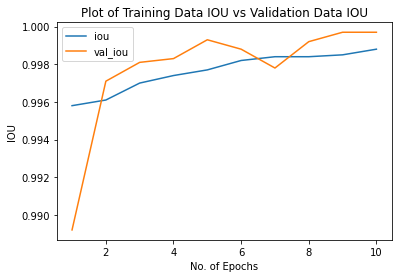

In [ ]:
# plotting IoU Metrics
import matplotlib.pyplot as plt

EPOCHS = 10
x = np.arange(1,EPOCHS+1)

plt.title("Plot of Training Data IOU vs Validation Data IOU")
plt.plot(x,training_model_iou, label='iou')
plt.plot(x,training_model_val_iou, label='val_iou')
plt.legend()

plt.ylabel('IOU')
plt.xlabel('No. of Epochs')
#plt.ylim(ymin=0)

plt.show()

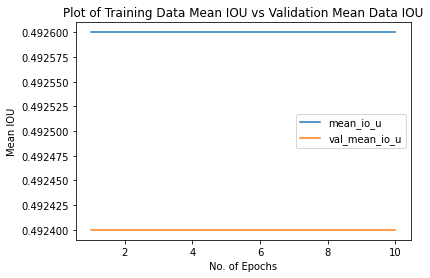

In [ ]:
# plotting MeanIoU Metrics

x = np.arange(1,EPOCHS+1)

plt.title("Plot of Training Data Mean IOU vs Validation Mean Data IOU")
plt.plot(x,training_model_MeanIOU, label='mean_io_u')
plt.plot(x,training_model_val_MeanIOU, label='val_mean_io_u')
plt.legend()

plt.ylabel('Mean IOU')
plt.xlabel('No. of Epochs')
#plt.ylim(ymin=0)

plt.show()

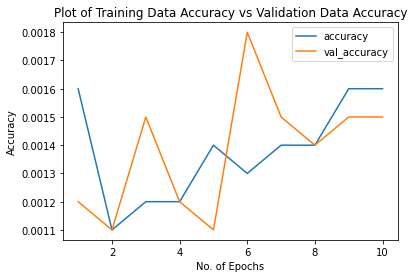

In [ ]:
# plotting Accuracy Metrics

plt.title("Plot of Training Data Accuracy vs Validation Data Accuracy")
plt.plot(x,training_model_accuracy, label='accuracy')
plt.plot(x,training_model_val_accuracy, label='val_accuracy')
plt.legend()

plt.ylabel('Accuracy')
plt.xlabel('No. of Epochs')
#plt.ylim(ymin=0,ymax=0.0001)

plt.show()

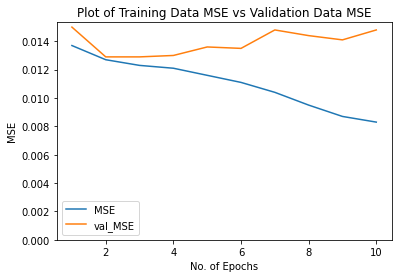

In [ ]:
# plotting Loss / mean_squared_error Metrics

plt.title("Plot of Training Data MSE vs Validation Data MSE")
plt.plot(x,training_model_mse, label='MSE')
plt.plot(x,training_model_val_mse, label='val_MSE')
plt.legend()

plt.ylabel('MSE')
plt.xlabel('No. of Epochs')
plt.ylim(ymin=0)

plt.show()

### Step 7 Testing the model prediction
This is sort of the moment of truth, where I will run a few DICOM images through for the model to predict. I will preprocess them in a similar way to how the image was fed into the data generator. For this, I picked 2 images with pneumonia detected and 2 images without pneumonia detected. The results are below.
<br> For the images with pneumonia detected, I can see that the model predicts it generally quite well, although it is definitely not the high IOU performance seen in the above IOU metric. At least the model is able to detect the pneumonia area to a generally good accuracy. But there is definitely still room for improvement.
<br> For the images without pneumonia detected though, I can see that the model performs poorly. Even though the image does not have pneumonia, the model will still predict a bounding box indicating pneumonia detected, albeit a significantly smaller and less clear bounding box area. This is definitely an area for improvement in order to make sure that the model is able to work as expected as having this issue will definitely result in a high number of false positives.

In [ ]:
# Randomly taking some samples to check the model predictions now

from tensorflow.keras.applications.mobilenet import preprocess_input
import tensorflow as tf

test_patientId = df_label['patientId'][994:999]

batch_test_images = np.zeros((len(test_patientId), 64 , 64 , 3), dtype=np.float32)
batch_test_masks = []

for n,i in enumerate(test_patientId):
  path = 'stage_2_train_images/' + i + '.dcm'
  img = pydicom.dcmread(path)
  img_ds = img.pixel_array[::16, ::16]
  img_ds = tf.reshape(img_ds, [64, 64 ,1])  
  img_ds = tf.image.grayscale_to_rgb(img_ds)
  batch_test_images[n] = preprocess_input(np.array(img_ds, dtype=np.float32))
  
  path_mask = 'training_masks_64/' + i + '.npy'
  batch_test_masks.append(np.load(path_mask))

mask_pred = model.predict(batch_test_images)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


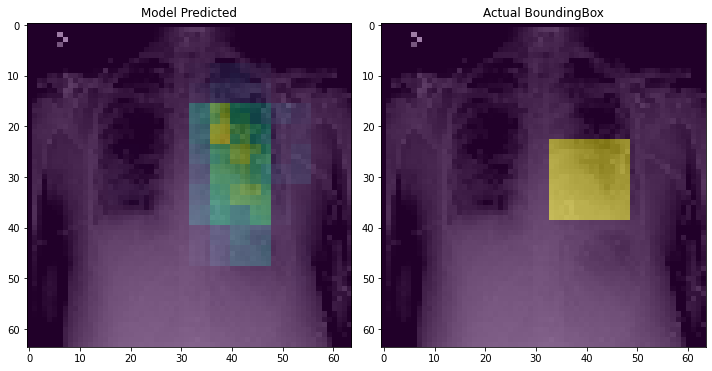

In [ ]:
# Visual Image 1 with pneumonia detected

i = 0

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,10));
ax1.set_title("Model Predicted")
ax1.imshow(batch_test_images[i])
ax1.imshow(mask_pred[i], alpha=0.5)
ax2.set_title("Actual BoundingBox")
ax2.imshow(batch_test_images[i])
ax2.imshow(batch_test_masks[i], alpha=0.5)
fig.tight_layout()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


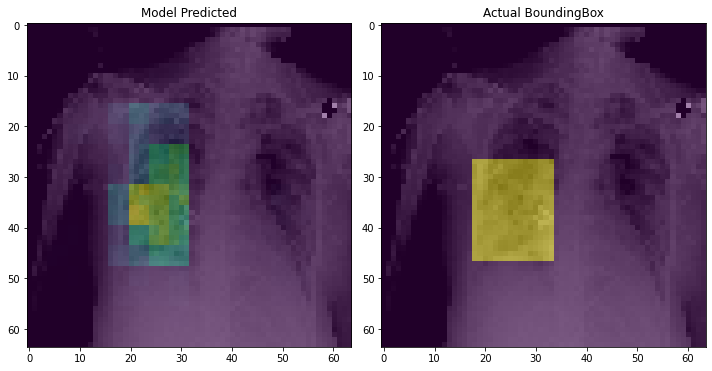

In [ ]:
# Visual Image 2 with pneumonia detected

i = 3

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,10));
ax1.set_title("Model Predicted")
ax1.imshow(batch_test_images[i])
ax1.imshow(mask_pred[i], alpha=0.5)
ax2.set_title("Actual BoundingBox")
ax2.imshow(batch_test_images[i])
ax2.imshow(batch_test_masks[i], alpha=0.5)
fig.tight_layout()

In [ ]:
test_patientId = df_label['patientId'][:2]

batch_test_images = np.zeros((len(test_patientId), 64 , 64 , 3), dtype=np.float32)
batch_test_masks = []

for n,i in enumerate(test_patientId):
  path = 'stage_2_train_images/' + i + '.dcm'
  img = pydicom.dcmread(path)
  img_ds = img.pixel_array[::16, ::16]
  img_ds = tf.reshape(img_ds, [64, 64 ,1])  
  img_ds = tf.image.grayscale_to_rgb(img_ds)
  batch_test_images[n] = preprocess_input(np.array(img_ds, dtype=np.float32))
  
  path_mask = 'training_masks_64/' + i + '.npy'
  batch_test_masks.append(np.load(path_mask))

mask_pred = model.predict(batch_test_images)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


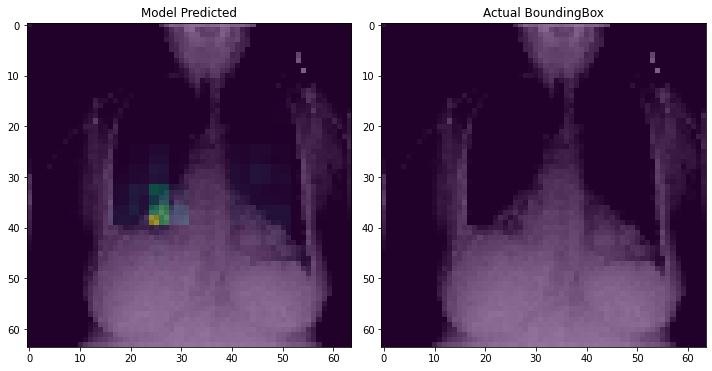

In [ ]:
# Visual Image 1 without pneumonia detected

i = 0

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,10));
ax1.set_title("Model Predicted")
ax1.imshow(batch_test_images[i])
ax1.imshow(mask_pred[i], alpha=0.5)
ax2.set_title("Actual BoundingBox")
ax2.imshow(batch_test_images[i])
ax2.imshow(batch_test_masks[i], alpha=0.5)
fig.tight_layout()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


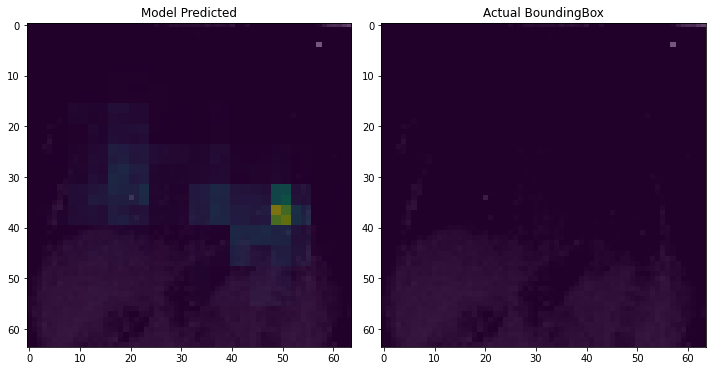

In [ ]:
# Visual Image 2 without pneumonia detected

i = 1

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,10));
ax1.set_title("Model Predicted")
ax1.imshow(batch_test_images[i])
ax1.imshow(mask_pred[i], alpha=0.5)
ax2.set_title("Actual BoundingBox")
ax2.imshow(batch_test_images[i])
ax2.imshow(batch_test_masks[i], alpha=0.5)
fig.tight_layout()

### Summary and Conclusion
Going back to the main aim of this project which is to build an automated pneumonia detection system to locate the position of inflammation in an image, I would say that the model built so far would achieve this to a certain extent, but definitely the model can be improved further.
<br>With the model at the current stage, it can help healthcare specialists to semi-automate the process of detecting pneumonia in lung images. With the current model, it is able to detect pneumonia with ease but with a certain degree of variance. The precise area has to be further looked into by the healthcare specialists though as the predicted area might be too large or not accurate enough. Also, there will be many false positives generated as well as the current model predicts smaller pneumonia bounding boxes in images where there are no pneumonia detected.
<br>As such, the current model can serve as a first line of defense to screen through the DICOM images. After the model predicts the bounding boxes, the healthcare specialist can prioritize patients those images predicted with a bigger bounding box area as patients with a higher probability of pneumonia detected. For those images predicted with very small bounding box, healthcare specialist can look at those with a lower priority as they are deemed to have a higher probability of no pneumonia. An additional layer of algorithmn could be used to detect the sizes of the predicted bounding box area and this will assess which bounding boxes are considered to be bigger such that healthcare specialist will prioritize them and which bounding boxes are considered smaller. This will help with their triage process for determining priority of patients to administering the appropriate healthcare service to.
<br>**Next Steps**
<br>As for next steps, the model performs good, but not well enough. In order to fully automate the process of detecting pneumonia, the model has to be further improved. Through the project notes, I have briefly mentioned some notes of minor improvements to do to improve the model, which I will be summarizing in the points below.

1. Improve the inputs to the custom generator by creating additional codes/ functions to handle for an image having multiple bounding boxes. The current set up only accepts 1 bounding box per image, and it may introduce an inherent bias.
2. Try different variants of the learning rate on the Adam optimizer and consider perhaps even modifying the monitoring loss rate on ModelCheckpoint, EarlyStopping and ReduceLROnPlateau to validation MSE instead.
3. Since there is a problem of high number of false positives from the model detecting images with pneumonia when the images do not have, the model could be further improved on by modifying the architecture of the Neural network to be similar to mask R-CNN, which has another Neural Network to predict the target of the image, if it has pneumonia or not. That way, the model will be able to distinguish images without pneumonia and should reduce the number of false positives.

